In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
pd.set_option('display.max_columns',None)

In [4]:
df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


# Histogram Distribusi Harga Rumah

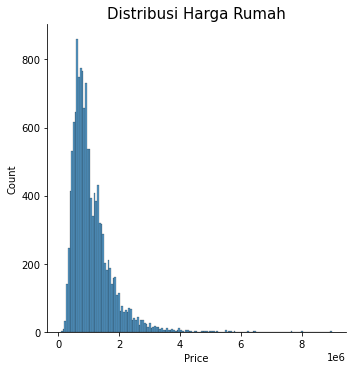

In [13]:
sns.displot(df['Price'])
plt.title('Distribusi Harga Rumah',size=15)
plt.show()

# Box Plot Distribusi Jarak ke CBD berdasarkan Nama Region

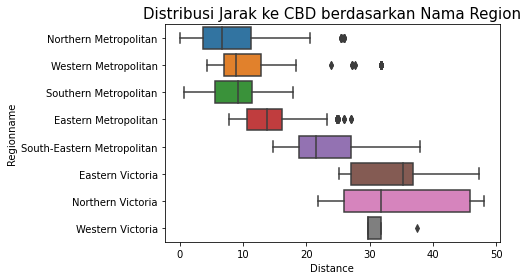

In [15]:
sns.boxplot(data=df, y='Regionname' , x='Distance')
plt.title('Distribusi Jarak ke CBD berdasarkan Nama Region',size=15)
plt.show()

# Bar Plot Perbandingan Nilai Median Harga Rumah

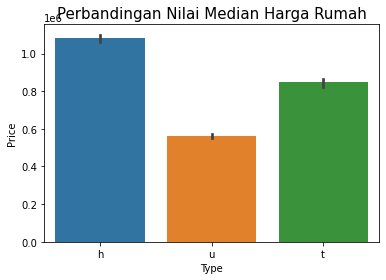

In [20]:
sns.barplot(data=df,x='Type',y='Price',estimator=np.median)
plt.title('Perbandingan Nilai Median Harga Rumah',size=15)
plt.show()

# Scatter Plot Korelasi Harga Rumah dan Jarak Rumah ke CBD

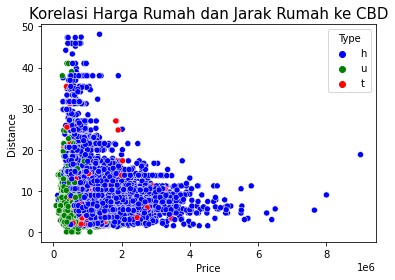

In [23]:
sns.scatterplot(data=df,x='Price',y='Distance',hue='Type',palette=['blue','green','red'])
plt.title('Korelasi Harga Rumah dan Jarak Rumah ke CBD',size=15)
plt.show()

# Line Plot Tren Harga Rumah per Bulan berdasarkan Tipe Rumah

In [24]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [33]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [40]:
df['Date']=df['Date'].astype('datetime64')
df['Date']

0       2016-03-12
1       2016-04-02
2       2017-04-03
3       2017-04-03
4       2016-04-06
           ...    
13575   2017-08-26
13576   2017-08-26
13577   2017-08-26
13578   2017-08-26
13579   2017-08-26
Name: Date, Length: 13580, dtype: datetime64[ns]

In [41]:
df.dtypes

Suburb                   object
Address                  object
Rooms                     int64
Type                     object
Price                   float64
Method                   object
SellerG                  object
Date             datetime64[ns]
Distance                float64
Postcode                float64
Bedroom2                float64
Bathroom                float64
Car                     float64
Landsize                float64
BuildingArea            float64
YearBuilt               float64
CouncilArea              object
Lattitude               float64
Longtitude              float64
Regionname               object
Propertycount           float64
dtype: object

In [44]:
df['Month'] = pd.DatetimeIndex(df['Date']).month
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,3
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,4
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,4
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,4
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,4


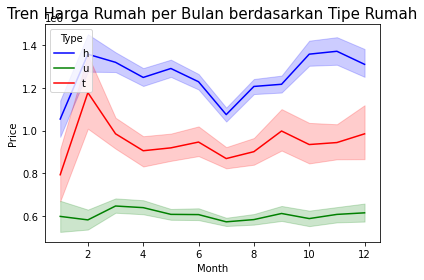

In [45]:
sns.lineplot(data=df,x='Month',y='Price',hue='Type',palette=['blue','green','red'])
plt.title('Tren Harga Rumah per Bulan berdasarkan Tipe Rumah',size=15)
plt.show()

# Pie Chart Proporsi Luas Tahan tiap Region

In [65]:
landsize_prop = pd.DataFrame(df.groupby('Regionname').sum()['Landsize']).reset_index()
landsize_prop

,Regionname,Landsize
0,Eastern Metropolitan,932811.0
1,Eastern Victoria,156334.0
2,Northern Metropolitan,2213208.0
3,Northern Victoria,137574.0
4,South-Eastern Metropolitan,276296.0
5,Southern Metropolitan,2390939.0
6,Western Metropolitan,1455153.0
7,Western Victoria,20976.0


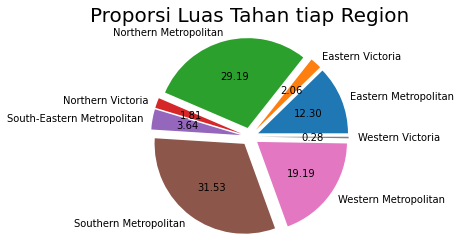

In [73]:
plt.pie(landsize_prop.Landsize,
        labels=landsize_prop['Regionname'],
        autopct='%.2f',
        explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
       )
plt.axis('equal')
plt.title('Proporsi Luas Tahan tiap Region',size=20)
plt.show()

# Heatmap Korelasi Harga, Jarak, Luas Tanah dan Jumlah Kamar

In [77]:
corr_matrix=df[['Price','Distance','Landsize','Rooms']].corr()
corr_matrix

,Price,Distance,Landsize,Rooms
Price,1.000000,-0.162522,0.037507,0.496634
Distance,-0.162522,1.000000,0.025004,0.294203
Landsize,0.037507,0.025004,1.000000,0.025678
Rooms,0.496634,0.294203,0.025678,1.000000


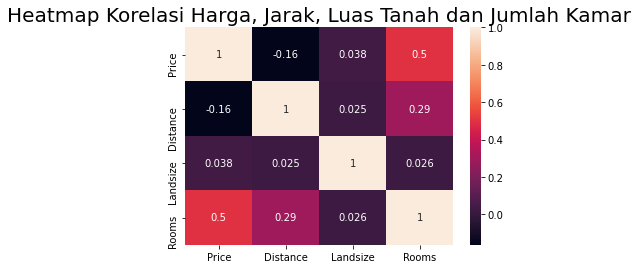

In [82]:
sns.heatmap(corr_matrix,annot=True)
plt.title('Heatmap Korelasi Harga, Jarak, Luas Tanah dan Jumlah Kamar',size=20)
plt.show()

# Price

In [124]:
topten_price = pd.DataFrame(df.nlargest(10,'Price')).reset_index().drop('index',axis=1)
topten_price['Price']=(topten_price['Price']/1000000).astype(str)
topten_price

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month
0,Mulgrave,35 Bevis St,3,h,9.0,PI,Hall,2017-07-29,18.8,3170.0,3.0,1.0,1.0,744.0,117.0,1960.0,Monash,-37.93168,145.16126,South-Eastern Metropolitan,7113.0,7
1,Canterbury,49 Mangarra Rd,5,h,8.0,VB,Sotheby's,2017-05-13,9.0,3126.0,5.0,5.0,4.0,2079.0,464.3,1880.0,Boroondara,-37.81790,145.06940,Southern Metropolitan,3265.0,5
2,Hawthorn,49 Lisson Gr,4,h,7.65,S,Abercromby's,2017-06-17,5.3,3122.0,4.0,2.0,4.0,1690.0,284.0,1863.0,Boroondara,-37.82652,145.03052,Southern Metropolitan,11308.0,6
3,Kew,15 Barry St,6,h,6.5,S,Jellis,2016-08-13,5.6,3101.0,6.0,6.0,3.0,1334.0,365.0,1890.0,Boroondara,-37.80290,145.02670,Southern Metropolitan,10331.0,8
4,Middle Park,136 Page St,5,h,6.4,S,Marshall,2017-09-09,3.0,3206.0,5.0,2.0,1.0,553.0,308.0,1920.0,NaN,-37.84908,144.95753,Southern Metropolitan,2019.0,9
5,Toorak,17 Albany Rd,3,h,6.25,S,Kay,2016-10-15,4.6,3142.0,3.0,3.0,2.0,564.0,342.0,2000.0,Stonnington,-37.84860,145.02440,Southern Metropolitan,7217.0,10
6,Brighton,161 Church St,5,h,5.8,PI,Castran,2017-08-04,11.2,3186.0,5.0,4.0,4.0,1276.0,NaN,1880.0,Bayside,-37.91640,144.99740,Southern Metropolitan,10579.0,8
7,South Yarra,18 Avoca St,4,h,5.7,S,Castran,2016-12-11,3.3,3141.0,4.0,2.0,0.0,292.0,272.0,1880.0,Stonnington,-37.83770,144.98940,Southern Metropolitan,14887.0,12
8,Middle Park,204 Page St,6,h,5.6,PI,Marshall,2017-03-06,3.0,3206.0,6.0,4.0,2.0,472.0,328.0,1915.0,Port Phillip,-37.85231,144.96373,Southern Metropolitan,2019.0,3
9,Armadale,367 Dandenong Rd,6,h,5.525,S,Marshall,2016-09-17,6.3,3143.0,5.0,3.0,4.0,1491.0,516.0,1935.0,Stonnington,-37.86020,145.01300,Southern Metropolitan,4836.0,9


In [129]:
melb_map = folium.Map(location=[-37.8136, 144.963],zoom_start=11)
for i in range(len(topten_price)):
    folium.Marker([topten_price['Lattitude'][i],topten_price['Longtitude'][i]],
                  popup='Price:\nAUD\n'+topten_price['Price'][i]+' M',
                  tooltip=topten_price['Address'][i],
                  icon=folium.Icon(color='red',icon='info-sign')
                 ).add_to(melb_map)
melb_map